In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('lineages_with_amp.csv')

In [3]:
mean_output = df.groupby('superkingdom').aggregate('mean')['num_AMP']

In [4]:
mean_output

superkingdom
Archaea       30.107507
Bacteria      41.812697
Eukaryota    161.379085
Viruses        0.687741
Name: num_AMP, dtype: float64

In [5]:
median_output = df.groupby('superkingdom').aggregate('median')['num_AMP']

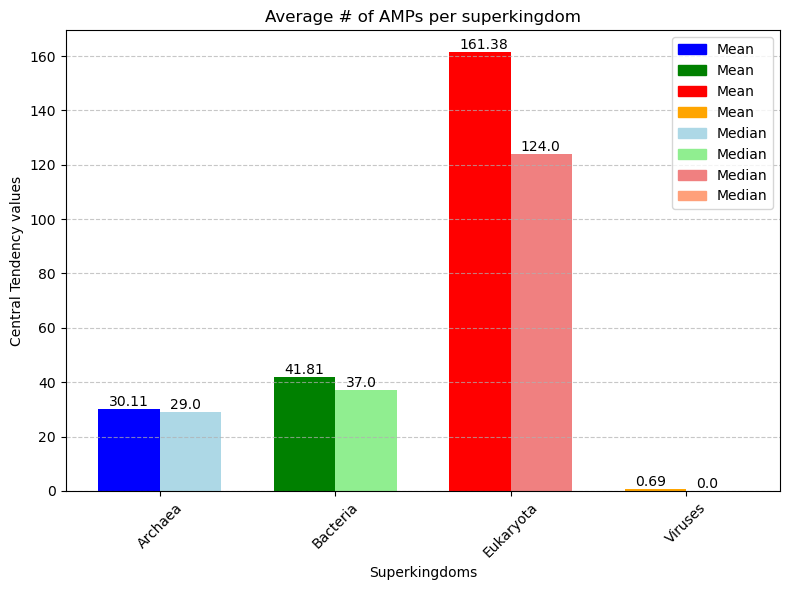

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming mean_output and median_output are dictionaries containing mean and median values respectively

# Plotting
plt.figure(figsize=(8, 6))

# Define the width of each bar
bar_width = 0.35

# Define the x locations for the groups of bars
x_mean = range(len(mean_output))
x_median = [x + bar_width for x in x_mean]

# Plot the bars for mean values
mean_bars = plt.bar(x_mean, mean_output.values, width=bar_width, color=['blue', 'green', 'red', 'orange'], label='Mean')

# Plot the bars for median values
median_bars = plt.bar(x_median, median_output.values, width=bar_width, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'], label='Median')

plt.title('Average # of AMPs per superkingdom')
plt.xlabel('Superkingdoms')
plt.ylabel('Central Tendency values')
plt.xticks([x + bar_width/2 for x in x_mean], mean_output.keys(), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding exact values on top of bars
for bars in [mean_bars, median_bars]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/6, yval, round(yval, 2), va='bottom')

# Add legend
mean_patches = [mpatches.Patch(color=color, label='Mean') for color in ['blue', 'green', 'red', 'orange']]
median_patches = [mpatches.Patch(color=color, label='Median') for color in ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']]
plt.legend(handles=mean_patches + median_patches)

# Display the plot
plt.tight_layout()
plt.savefig('avg_amps.png')
plt.show()

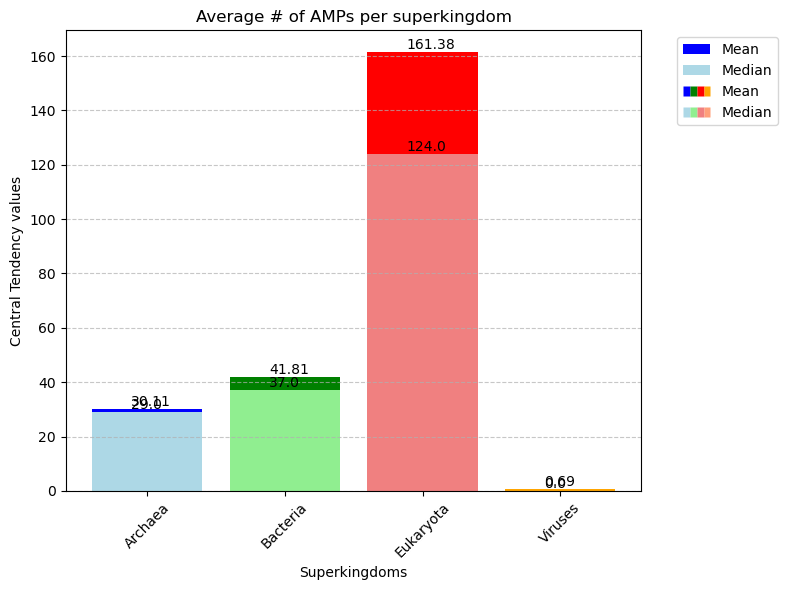

In [7]:
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

# Define a handler for the MulticolorPatch object
class MulticolorPatchHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        width, height = handlebox.width, handlebox.height
        patches = []
        for i, c in enumerate(orig_handle.colors):
            patches.append(plt.Rectangle([width/len(orig_handle.colors) * i - handlebox.xdescent, 
                                          -handlebox.ydescent],
                           width / len(orig_handle.colors),
                           height, 
                           facecolor=c, 
                           edgecolor='none'))

        patch = PatchCollection(patches, match_original=True)

        handlebox.add_artist(patch)
        return patch

# Define an object that will be used by the legend
class MulticolorPatch(object):
    def __init__(self, colors):
        self.colors = colors

# Assuming mean_output and median_output are dictionaries containing mean and median values respectively
mean_colors = ['blue', 'green', 'red', 'orange']
median_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Plotting
plt.figure(figsize=(8, 6))

# Plot bars for mean values
mean_bars = plt.bar(mean_output.keys(), mean_output.values, color=mean_colors, label='Mean')

# Plot bars for median values
median_bars = plt.bar(median_output.keys(), median_output.values, color=median_colors, label='Median')

plt.title('Average # of AMPs per superkingdom')
plt.xlabel('Superkingdoms')
plt.ylabel('Central Tendency values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding exact values on top of bars
for bars in [mean_bars, median_bars]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.8, yval, round(yval, 2), va='bottom')

# Get the legend entries that are already attached to the axis
handles, labels = plt.gca().get_legend_handles_labels()

# Append the multicolor legend patches
handles.append(MulticolorPatch(mean_colors))
labels.append("Mean")

handles.append(MulticolorPatch(median_colors))
labels.append("Median")

# Create the legend
plt.legend(handles=handles, labels=labels, loc='upper left', handler_map={MulticolorPatch: MulticolorPatchHandler()}, bbox_to_anchor=(1.05, 1))

# Display the plot
plt.tight_layout()
plt.show()

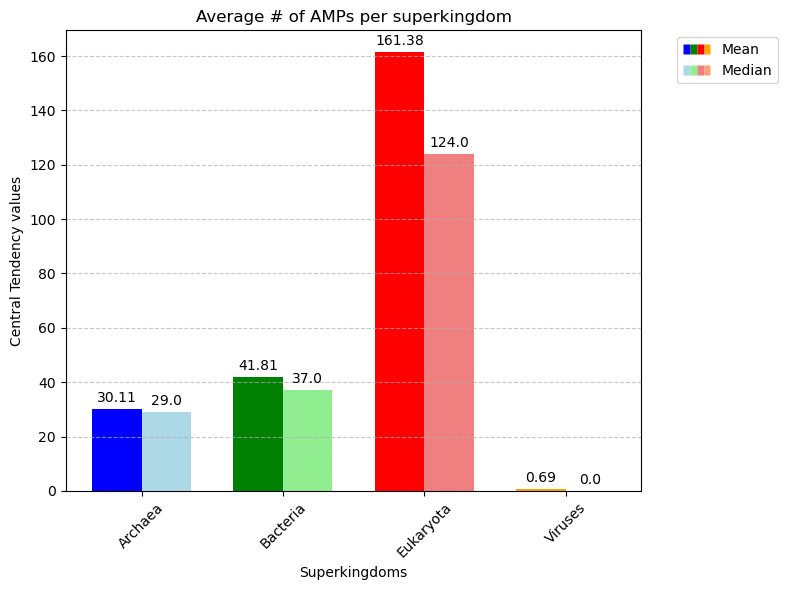

In [8]:
import matplotlib.pyplot as plt

# Assuming mean_output and median_output are dictionaries containing mean and median values respectively
mean_colors = ['blue', 'green', 'red', 'orange']
median_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Plotting
plt.figure(figsize=(8, 6))

# Define the width of each bar
bar_width = 0.35

# Define the x locations for the groups of bars
x_mean = range(len(mean_output))
x_median = [x + bar_width for x in x_mean]

# Plot bars for mean values
mean_bars = plt.bar(x_mean, mean_output.values, width=bar_width, color=mean_colors, label='Mean')

# Plot bars for median values
median_bars = plt.bar(x_median, median_output.values, width=bar_width, color=median_colors, label='Median')

plt.title('Average # of AMPs per superkingdom')
plt.xlabel('Superkingdoms')
plt.ylabel('Central Tendency values')
plt.xticks([x + bar_width/2 for x in x_mean], mean_output.keys(), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Function to automatically label bars with their height
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 2)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

# Call autolabel for mean and median bars
autolabel(mean_bars)
autolabel(median_bars)

# Create the legend with MulticolorPatchHandler
plt.legend(handles=[MulticolorPatch(mean_colors), MulticolorPatch(median_colors)], 
           labels=['Mean', 'Median'], 
           loc='upper left', 
           handler_map={MulticolorPatch: MulticolorPatchHandler()}, 
           bbox_to_anchor=(1.05, 1))

# Display the plot
plt.tight_layout()
plt.savefig('avg_amps.png')
plt.show()


In [14]:
from zipfile import ZipFile

num_amp = []
amp_perc = []
runtime = []
# Specify the path to your zip file
zip_file_path = 'outputs.zip'

# Open the zip file
with ZipFile(zip_file_path, 'r') as zip_file:
    # Get the list of files in the zip archive
    file_list = zip_file.namelist()
    
    # Check if there are any files in the zip archive
    if file_list:
        # Access the first file in the list
        first_file_name = file_list[1]
        
        # Open the first file and read its content
        with zip_file.open(first_file_name) as first_file:
            # Process the content of the first file here
            first_file_content = first_file.read().decode('utf-8')
            
            # Filter the content to include only text starting with "num" and ending with ".gz"
            lines_starting_with = [line for line in first_file_content.split('\n') if line.startswith(('num','AMP','time to process'))]
            for lines in lines_starting_with:
                if lines.startswith('num'):
                    num_amp.append(lines)
                elif lines.startswith('AMP'):
                    amp_perc.append(lines)
                elif lines.startswith('time to process'):
                    runtime.append(lines)

In [15]:
lines_starting_with

['num positive for AMP = 36. Total sequences processed = 866',
 'AMP detection rate with threshold of 0.99 = 0.04157043879907621',
 'time to process file: 24.006924152374268',
 'num positive for AMP = 11. Total sequences processed = 658',
 'AMP detection rate with threshold of 0.99 = 0.016717325227963525',
 'time to process file: 18.120779991149902',
 'num positive for AMP = 19. Total sequences processed = 938',
 'AMP detection rate with threshold of 0.99 = 0.02025586353944563',
 'time to process file: 25.182413339614868',
 'num positive for AMP = 18. Total sequences processed = 790',
 'AMP detection rate with threshold of 0.99 = 0.02278481012658228',
 'time to process file: 21.451878309249878',
 'num positive for AMP = 63. Total sequences processed = 1321',
 'AMP detection rate with threshold of 0.99 = 0.04769114307342922',
 'time to process file: 35.46342945098877',
 'num positive for AMP = 50. Total sequences processed = 949',
 'AMP detection rate with threshold of 0.99 = 0.05268703

In [17]:
import re
num_amps = [s.split('. ')[0] for s in num_amp]
amps_num = []
for li in num_amps:
    amps_num.extend(int(num) for num in re.findall(r'\d+', li))

In [18]:
amps_num

[36,
 11,
 19,
 18,
 63,
 50,
 11,
 48,
 24,
 43,
 23,
 24,
 22,
 23,
 18,
 40,
 26,
 14,
 31,
 36,
 14,
 24,
 21,
 27,
 51,
 15,
 63,
 45,
 57,
 47,
 35,
 69,
 18,
 50,
 63,
 8,
 24,
 65,
 32,
 19,
 17,
 41,
 25,
 50,
 39,
 76,
 39,
 65,
 28,
 41,
 39,
 42,
 52,
 20,
 31,
 40,
 39,
 50,
 54,
 39,
 37,
 65,
 66,
 69,
 77,
 63,
 76,
 79,
 65,
 66,
 62,
 20,
 55,
 21,
 30,
 40,
 47,
 49,
 45,
 13,
 31,
 41,
 40,
 16,
 34,
 30,
 38,
 44,
 26,
 70,
 36,
 39,
 73,
 18,
 10,
 25,
 35,
 10,
 29,
 9,
 20,
 27,
 36,
 32,
 26,
 41,
 41,
 44,
 40,
 17,
 25,
 72,
 60,
 11,
 39,
 32,
 16,
 20,
 34,
 41,
 17,
 24,
 39,
 45,
 82,
 16,
 14,
 15,
 35,
 15,
 27,
 35,
 64,
 126,
 42,
 39,
 23,
 25,
 34,
 39,
 25,
 27,
 39,
 17,
 53,
 22,
 13,
 7,
 31,
 37,
 29,
 12,
 40,
 36,
 34,
 32,
 34,
 22,
 25,
 33,
 15,
 43,
 36,
 26,
 32,
 34,
 34,
 42,
 37,
 36,
 16,
 10,
 25,
 37,
 14,
 43,
 7,
 38,
 17,
 17,
 10,
 11,
 7,
 23,
 29,
 60,
 42,
 17,
 55,
 46,
 11,
 33,
 13,
 25,
 53,
 19,
 26,
 37,
 72,
 10,
 9,


In [19]:
num_seq = [s.split('. ')[1] for s in num_amp]
seq_num = []
for li in num_seq:
    seq_num.extend(int(num) for num in re.findall(r'\d+', li))

In [20]:
seq_num

[866,
 658,
 938,
 790,
 1321,
 949,
 551,
 1373,
 965,
 942,
 1282,
 783,
 1430,
 1169,
 658,
 859,
 1382,
 709,
 1175,
 1094,
 1009,
 1099,
 571,
 1227,
 1773,
 726,
 1823,
 1497,
 1407,
 1280,
 1425,
 2441,
 441,
 1331,
 2092,
 599,
 557,
 2180,
 1592,
 1110,
 1140,
 1640,
 1145,
 1433,
 1554,
 1896,
 1612,
 2565,
 1297,
 1580,
 1539,
 936,
 1041,
 1179,
 905,
 1487,
 982,
 1140,
 1397,
 1137,
 1766,
 2569,
 2340,
 2232,
 2585,
 2253,
 2396,
 2525,
 2134,
 2259,
 2158,
 632,
 2036,
 917,
 1442,
 1186,
 1819,
 1835,
 1751,
 925,
 1111,
 859,
 902,
 664,
 930,
 873,
 1655,
 2078,
 1264,
 1835,
 962,
 1454,
 2619,
 513,
 1018,
 570,
 865,
 367,
 589,
 598,
 609,
 960,
 1245,
 1113,
 1042,
 1794,
 1685,
 1232,
 1070,
 986,
 817,
 1509,
 1737,
 96,
 793,
 1234,
 517,
 655,
 1057,
 737,
 1033,
 570,
 994,
 1425,
 1565,
 813,
 693,
 255,
 1063,
 375,
 1045,
 874,
 1114,
 2895,
 1277,
 1241,
 1431,
 1434,
 1054,
 649,
 1100,
 1073,
 1747,
 932,
 1496,
 387,
 503,
 250,
 820,
 1196,
 650,
 1

In [21]:
amp_perc = [round(float(s.split(' = ')[1]),4) for s in amp_perc]

In [22]:
amp_perc

[0.0416,
 0.0167,
 0.0203,
 0.0228,
 0.0477,
 0.0527,
 0.02,
 0.035,
 0.0249,
 0.0456,
 0.0179,
 0.0307,
 0.0154,
 0.0197,
 0.0274,
 0.0466,
 0.0188,
 0.0197,
 0.0264,
 0.0329,
 0.0139,
 0.0218,
 0.0368,
 0.022,
 0.0288,
 0.0207,
 0.0346,
 0.0301,
 0.0405,
 0.0367,
 0.0246,
 0.0283,
 0.0408,
 0.0376,
 0.0301,
 0.0134,
 0.0431,
 0.0298,
 0.0201,
 0.0171,
 0.0149,
 0.025,
 0.0218,
 0.0349,
 0.0251,
 0.0401,
 0.0242,
 0.0253,
 0.0216,
 0.0259,
 0.0253,
 0.0449,
 0.05,
 0.017,
 0.0343,
 0.0269,
 0.0397,
 0.0439,
 0.0387,
 0.0343,
 0.021,
 0.0253,
 0.0282,
 0.0309,
 0.0298,
 0.028,
 0.0317,
 0.0313,
 0.0305,
 0.0292,
 0.0287,
 0.0316,
 0.027,
 0.0229,
 0.0208,
 0.0337,
 0.0258,
 0.0267,
 0.0257,
 0.0141,
 0.0279,
 0.0477,
 0.0443,
 0.0241,
 0.0366,
 0.0344,
 0.023,
 0.0212,
 0.0206,
 0.0381,
 0.0374,
 0.0268,
 0.0279,
 0.0351,
 0.0098,
 0.0439,
 0.0405,
 0.0272,
 0.0492,
 0.0151,
 0.0328,
 0.0281,
 0.0289,
 0.0288,
 0.025,
 0.0229,
 0.0243,
 0.0357,
 0.0374,
 0.0172,
 0.0306,
 0.0477,
 0.03

In [23]:
import re

In [24]:
# Extract numbers from each string using regular expressions
runtime = [round(float(re.search(r'\d+\.\d+', r).group()),2) for r in runtime]

runtime

[24.01,
 18.12,
 25.18,
 21.45,
 35.46,
 26.5,
 15.32,
 37.05,
 27.11,
 26.68,
 34.55,
 21.13,
 38.2,
 31.91,
 17.29,
 22.9,
 36.74,
 19.18,
 31.35,
 30.03,
 27.9,
 30.51,
 15.33,
 32.48,
 47.23,
 19.06,
 47.76,
 40.23,
 38.19,
 34.16,
 38.3,
 66.09,
 12.22,
 35.39,
 57.53,
 16.65,
 15.11,
 58.19,
 42.51,
 30.35,
 30.16,
 44.67,
 31.44,
 39.02,
 41.28,
 51.96,
 43.01,
 67.6,
 35.14,
 42.15,
 40.89,
 26.14,
 28.91,
 33.11,
 24.23,
 40.18,
 26.17,
 30.36,
 37.24,
 31.11,
 47.69,
 69.45,
 62.52,
 59.24,
 68.18,
 61.3,
 64.46,
 66.76,
 58.42,
 61.77,
 57.06,
 16.79,
 57.16,
 25.7,
 39.14,
 32.47,
 48.7,
 48.87,
 46.69,
 24.74,
 29.31,
 23.07,
 24.1,
 18.16,
 25.82,
 23.35,
 43.74,
 54.76,
 34.44,
 48.67,
 25.63,
 39.11,
 71.23,
 14.01,
 28.07,
 15.38,
 23.3,
 10.05,
 16.2,
 16.47,
 17.23,
 26.92,
 33.45,
 30.62,
 28.7,
 47.74,
 44.82,
 32.57,
 29.59,
 26.32,
 21.89,
 39.9,
 46.61,
 2.63,
 21.29,
 33.59,
 13.87,
 17.72,
 29.32,
 19.93,
 28.81,
 15.72,
 26.35,
 38.01,
 42.17,
 21.94,
 18.48,

In [25]:
data = {'num_AMPs': amps_num, 'num_sequences': seq_num, '% AMP': np.array(amp_perc)*100, 'file_runtime (sec)': runtime}

In [26]:
final_df = pd.DataFrame(data)

In [27]:
final_df.to_csv('more_results.csv')

In [28]:
final_df

,num_AMPs,num_sequences,% AMP,file_runtime (sec)
0,36,866,4.16,24.01
1,11,658,1.67,18.12
2,19,938,2.03,25.18
3,18,790,2.28,21.45
4,63,1321,4.77,35.46
...,...,...,...,...
274,58,1424,4.07,38.37
275,10,659,1.52,17.91
276,55,1411,3.90,37.35
277,17,1219,1.39,33.33


In [29]:
import seaborn as sns

Text(0.5, 1.01, 'AMP Processing EDA')

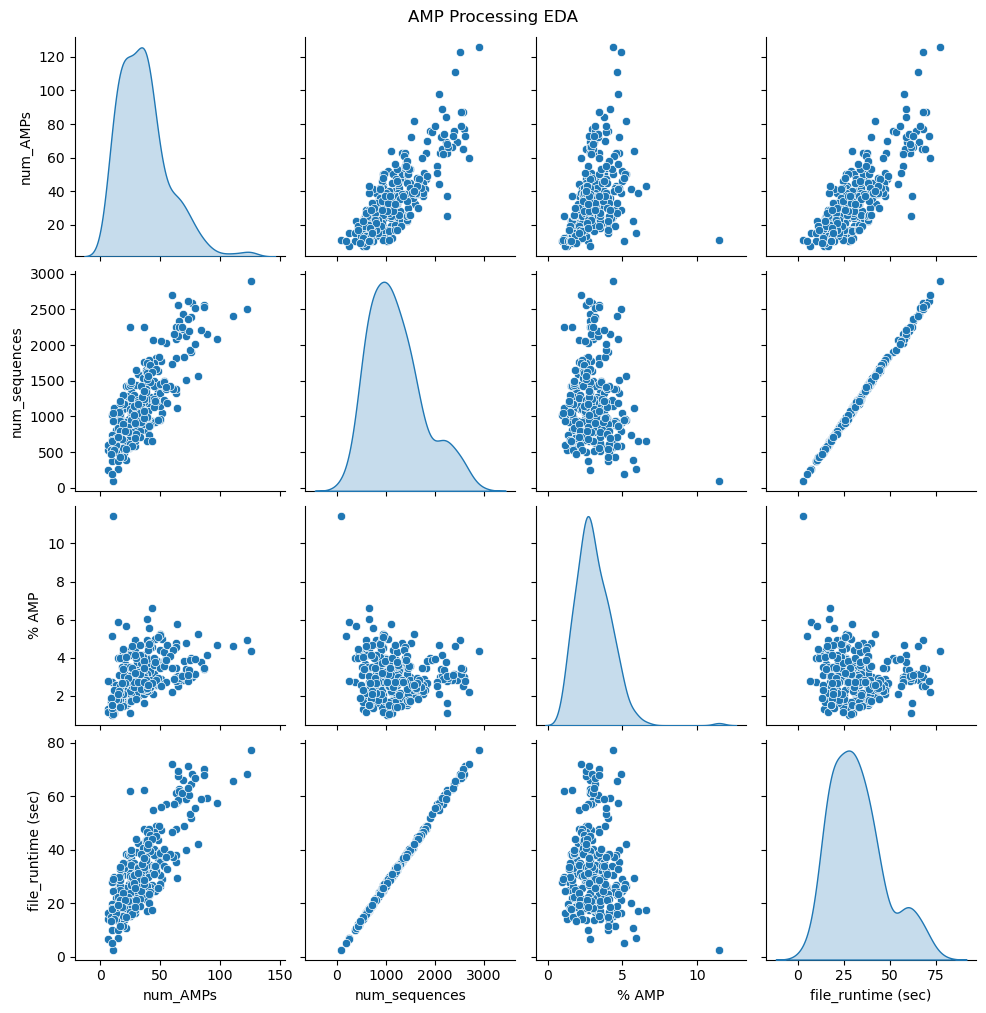

In [30]:
pairplot = sns.pairplot(final_df, diag_kind='kde', palette='husl')
pairplot.fig.suptitle('AMP Processing EDA', y=1.01)

In [275]:
pairplot.savefig('results_pairplot.png')